# Цели и задачи

* Отток клиентов – это потеря клиентов, выраженное в отсутствии покупок или платежей в течение определенного периода времени.
* Цель – уменьшить количество уходящих клиентов
* Задача – создать модель прогнозирования оттока клиентов для проведения компании по удержанию. Бинарная классификация, целевая переменная – вероятность оттока

# Постановка задачи

Данные были предоставлены французской телекоммуникационной компанией Orange. Клиентских данные были предварительно обфусцированы и анонимизированны: из датасета убрана любая персональная информация, позволяющая идентифицировать пользователей, а также не представлены названия и описания переменных, предназначенных для построения прогнозов. Датасет состоит из 50 тыс. объектов и включает 230 переменных, из которых первые 190 переменных - числовые, и оставшиеся 40 переменные - категориальные

# Методика измерения качества и критерий успеха

В решении задачи оттока, минимизируется ошибка второго рода. Нельзя допускать пропусков оттока, тк потеря пользователя несет большие убытки, чем применение удержания. Метрика ROC AUC позволяет в полной мере оценить точность, и что самое важное, полноту модели.
Существующее baseline решение имеет показатель ROC AUC 0.66710, преодоление этого показателя будет критерием успеха данной работы.

# Техническое описание решения

Pipeline:
1. Заполнение пропусков констнантыми значениями (0/unknown)
2. Энкодирование категариальных признаков с помощью CountEncoder из пакета category_encoders
3. Масшатбирование полученых категориальных признаков с помошью StandardScaler
4. Отбор топ 35 признаков с l1 регуляризации Lasso(alpha=0.1)
5. Применение комбинации оверсемплинга и андерсемплинга SMOTEENN из пакета imblearn
6. Классифкация с использованием GradientBoostingClassifier с параметрами:
    * learning_rate: 0.1
    * max_depth: 2
    * n_estimators: 100
    * subsample': 1.0

Построенная модель обеспечивает показатель качества ROC AUC = 0.72447 на тестовой выборке, и 0.714 на hold out.

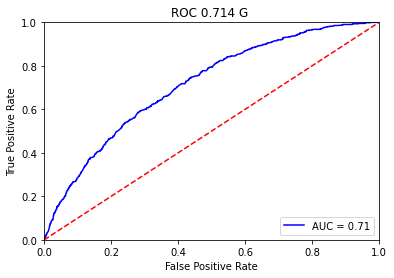
<center>рис. 1 ROC AUC на hold out dataset</center>

Наиболее важные признаки изображены на рис. 2

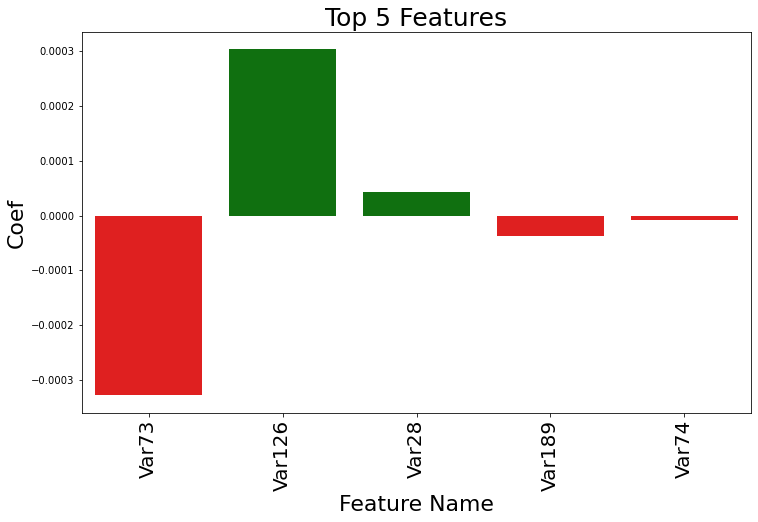
<center>рис. 2 Топ признаков</center>

# Экономическая эффективность

Экономическую эффективность модели можно обосновать с помощью простого эксперимента. Возмем прогноз оттока, сформированный моделью на тестовой выборке. Расчитаем экономический эффект, как разность прибыли при проведении компании по удержанию, и прибыли без проведения кампании (рис. 3).

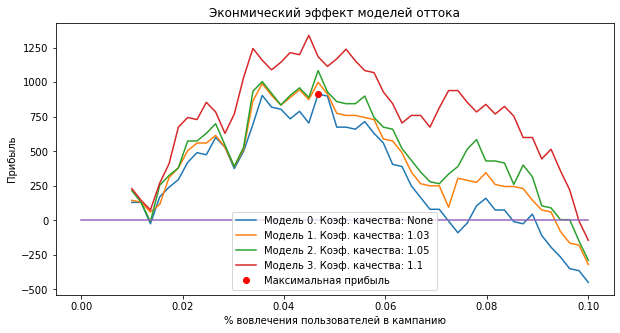
<center>рис. 3. Сравнительный анализ экономического эффекта</center>

Рост прибыли обеспечивается проведением кампании по удержанию, для пользователей предложенных нашей моделью. 

# Итоги

Построенная модель превосходит baseline решение по значению метрики ROC AUC (0.72447). Максимальная прибыль достигается при проведении кампании для топ 4.67% пользователей, упорядоченных по вероятности оттока. Требуется проведение A-B тестирования для выбора параметров компании по удержанию.